# My Name is KavehKarimadini
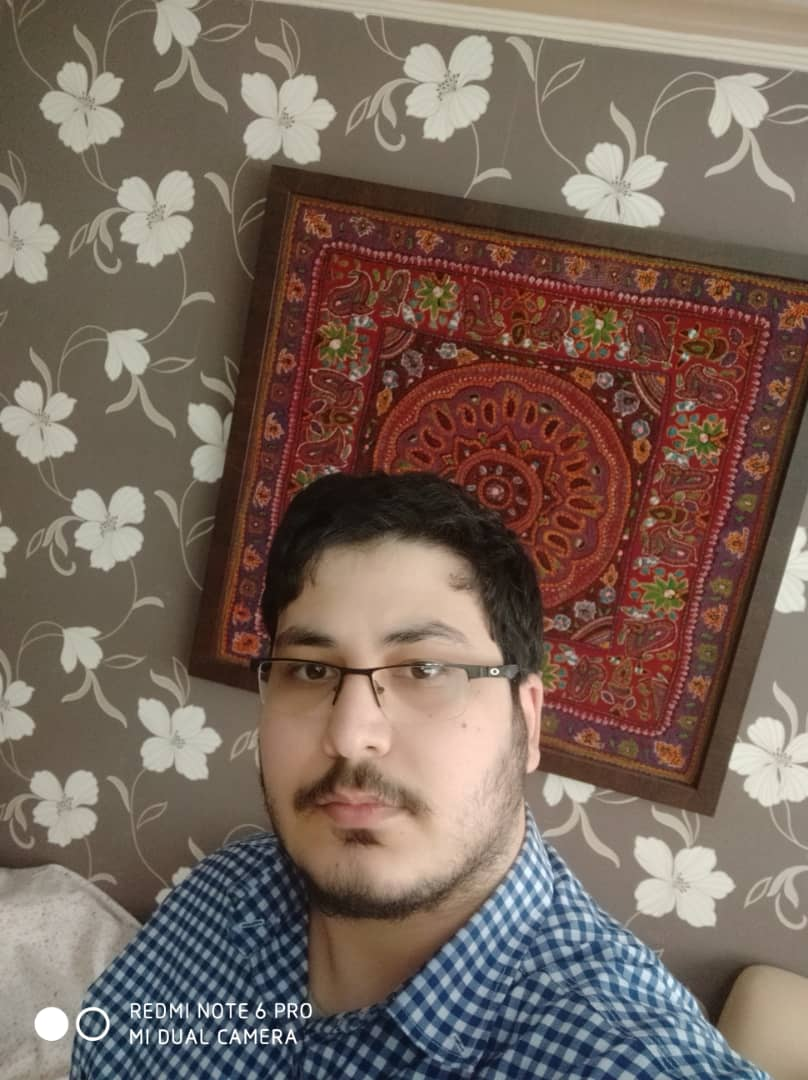

### 1-Manipulating Image:
* Image loading:the python function imageio.imread
* visualization of image:matplotlib . pyplot

### 2-Color quantization:
* reduces the number of distinct colors used in an image,
* a color image is usually quantized with 8 bits 
  (i.e. 256 gray levels) for each color component

### 3-image histogram:
* an image histogram represents the gray level distribution in a digital image

### 4-inear mapping of the image intensities
* Mathematically, it consists in finding a function f(x) = ax+b such that f(min) = 0 and f(max) = 255.

### 5-Alias effect
* Create an image (as right) that contains
  rings as sinusoids.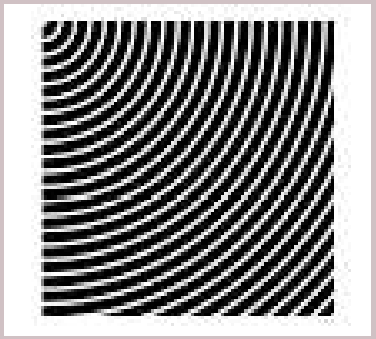 The function takes
  two input parameters: the sampling frequency and the signal frequency.
* Look at the influence of the two varying frequencies. What do you observe?
  Explain the phenomenon from a theoretical point of view.

### 6-low pass filtering:
* Low-pass filtering aims to smooth the fast intensity variations of the image to
    be processed.
* module scipy . ndimage. filters contains a lot of classical filters.

### 7-high pass filtering
* High-pass filtering aims to smooth the low intensity variations of the image to be
    processed.
* examples of high-pass:
1)HP(f) = f − LP(f) where LP is a low-pass filtering.
2) Laplacian (high-pass) filter with the
   following convolution mask
   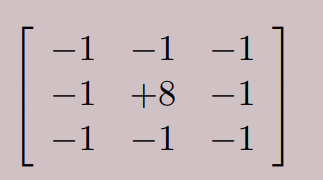

### 8-Derivative filtering
* aims to detect the edges (contours) of the image to be processed.
* examples of Derivative filtering:
1) Prewitt and Sobel derivative filters (corresponding to first order derivatives) with the use of the following convolution masks: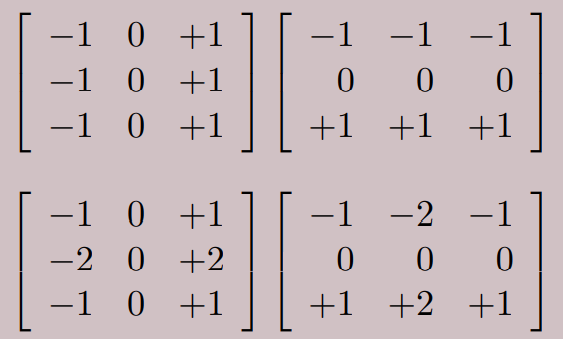
*  the edges could be also detected with the zero-crossings of the Laplacian filtering (corresponding to second order derivatives).

### 9-Enhancement filtering (E)
* aims to enhance the contrast or accentuate some specific image characteristics.


# image manipulation

In [21]:
# display images
import matplotlib . pyplot as plt
# ndimage defines a few filters
from scipy import misc, ndimage
# numeric calculation
import numpy as np
# measure time
import time
# read and save images
import imageio
# convolution method
from scipy . signal import convolve2d
#pip install scikit-image
import skimage
from skimage import exposure

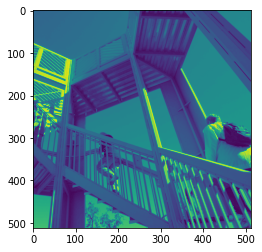

In [17]:
# load file ascent
ascent = misc.ascent()#Miscellaneous routines,ascent(): Get an 8-bit grayscale bit-depth, 512 x 512 derived image for easy use in demos
plt.imshow(ascent)

In [18]:
# load file cerveau.jpg
brain = imageio.imread('cerveau.jpg' )
print(type( brain) )
print( brain . shape, brain . dtype)

<class 'imageio.core.util.Array'>
(1148, 1838, 3) uint8


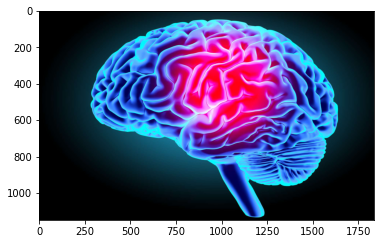

In [19]:
plt.imshow(brain)

In [11]:
# save file
imageio.imwrite('test.png', brain)

### matplotlib
* Matplotlib is a library in Python and it is numerical – mathematical extension for NumPy library. The figure module provides the top-level Artist, the Figure, which contains all the plot elements. This module is used to control the default spacing of the subplots and top level container for all plot elements

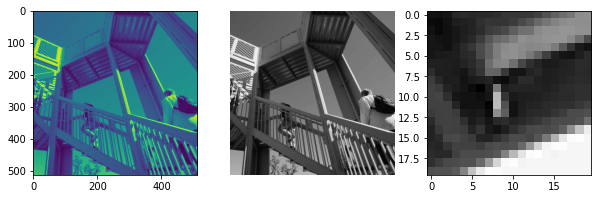

In [20]:
plt.figure(figsize=(10, 3.6))
# first subplot
plt.subplot(131)
plt.imshow(ascent)
# second subplot
plt.subplot (132)
plt.imshow(ascent,cmap=plt.cm.gray)
plt.axis('off')
#third subplot (zoom)
plt.subplot (133)
plt.imshow(ascent[200:220, 200:220], cmap=plt.cm.gray, interpolation ='nearest')#[rows,columns]->y,x

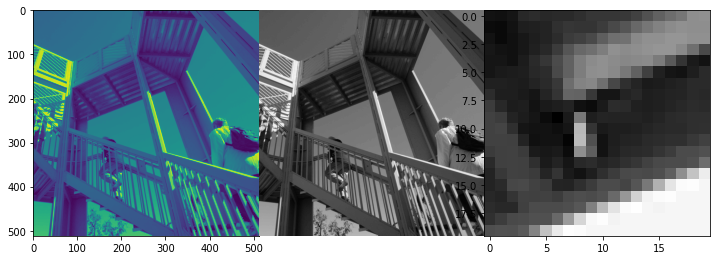

In [21]:
plt.figure(figsize=(10, 3.6))
# first subplot
plt.subplot(131)
plt.imshow(ascent)
# second subplot
plt.subplot (132)
plt.imshow(ascent,cmap=plt.cm.gray)
plt.axis('off')
#third subplot (zoom)
plt.subplot (133)
plt.imshow(ascent[200:220, 200:220], cmap=plt.cm.gray, interpolation ='nearest')#[rows,columns]->y,x
plt.subplots_adjust(wspace=0,hspace =0.,top =0.99, bottom=0.01,left =0.05, right =0.99)

(-0.5, 199.5, 199.5, -0.5)

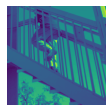

In [22]:
plt.subplot (132)
plt.imshow(ascent[300:500, 100:300])
plt.axis('off')

# color quantization

In [23]:
q4=ascent # 4∗4;
q16= ascent #16∗16;
q32= ascent #32∗32;

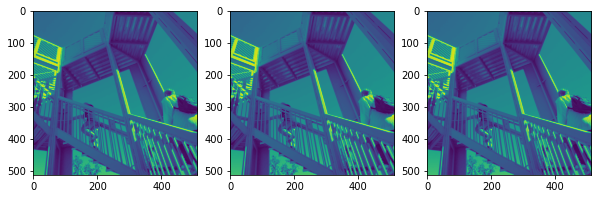

In [27]:
plt.figure(figsize=(10, 3.6))
plt.subplot(131)
plt.imshow(q4)
plt.subplot(132)
plt.imshow(q16)
plt.subplot(133)
plt.imshow(q32)

In [28]:
#compressing jpeg 
imageio.imwrite("a_25.jpeg " , ascent , quality =25)
imageio.imwrite("a_100.jpeg " , ascent , quality =100)
imageio.imwrite("a_50.jpeg " , ascent , quality =50)
imageio.imwrite("a_75.jpeg " , ascent , quality =75)
imageio.imwrite("a_1.jpeg " , ascent , quality =1)

Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from int32 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


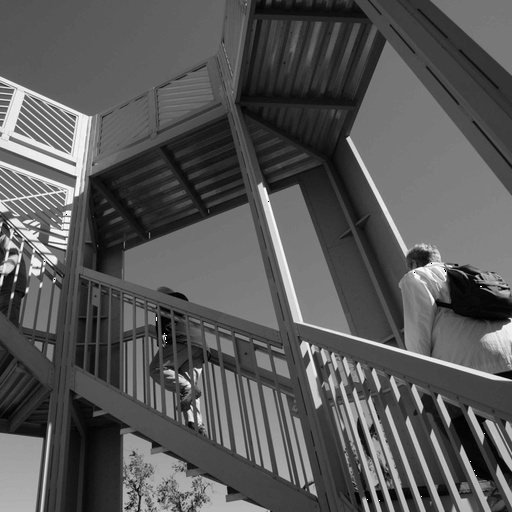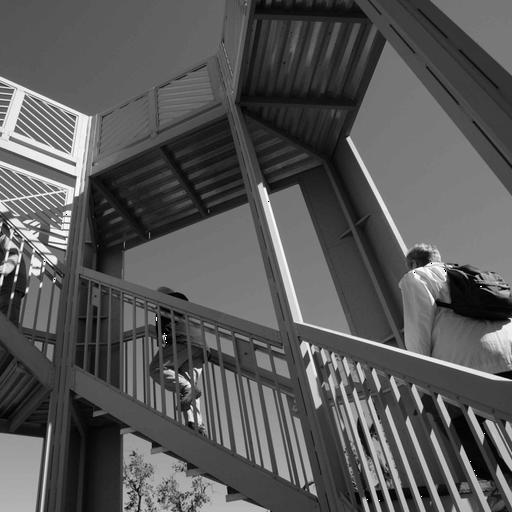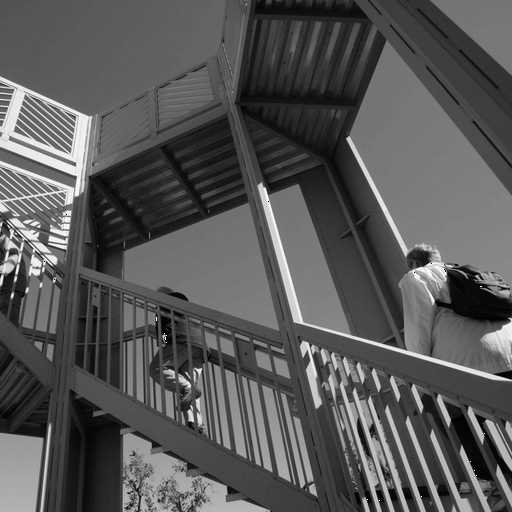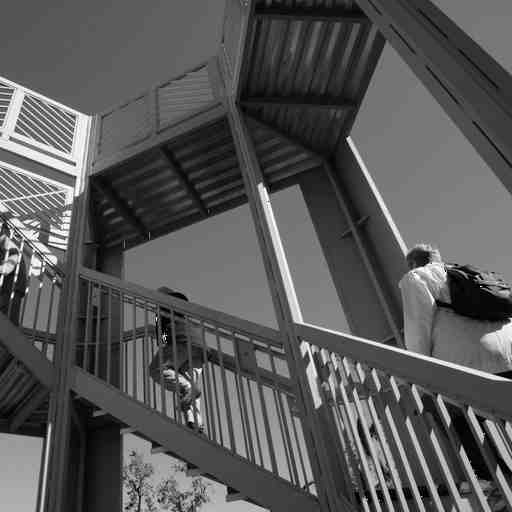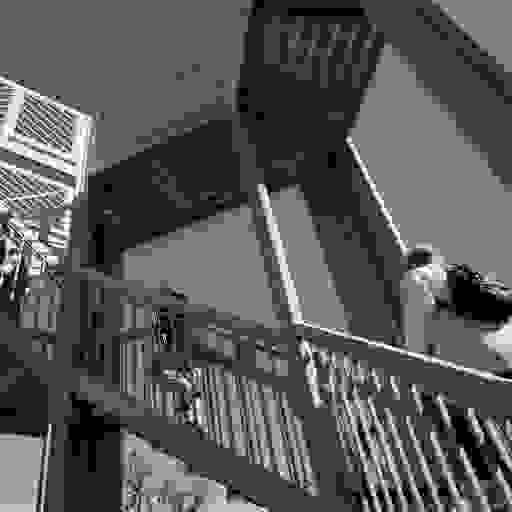

# histogram

(array([  38.,   28.,   73.,  190.,  190.,  443.,  504.,  720.,  645.,
         472.,  746.,  868.,  772.,  744.,  688.,  935., 1256., 1172.,
        1355.,  912., 1197., 1334., 1279., 1442., 1031., 1187., 1422.,
        1370., 1505., 1191., 1429., 1771., 1683., 1765., 1577., 1813.,
        2316., 2154., 2256., 1605., 1723., 2059., 1741., 1624., 1307.,
        1409., 1481., 1378., 1488., 1270., 1575., 2557., 1980., 2176.,
        1367., 1623., 1915., 1880., 2065., 1761., 2761., 3010., 3749.,
        3124., 1929., 2692., 2904., 3307., 3082., 1956., 2939., 3057.,
        2959., 2487., 1655., 2633., 2311., 1959., 1667., 1229., 2059.,
        1692., 1718., 1489.,  961., 1914., 1319., 3205., 1208., 1054.,
        3312., 1492., 4000., 1349., 1110., 4098., 1525., 3494., 1372.,
        1098., 2470., 1496., 1187.,  942.,  726.,  741.,  689.,  659.,
         667.,  519.,  576.,  547., 2121.,  646.,  618., 3927., 1163.,
        6951., 1055.,  878., 6550., 1207., 4584.,  797.,  628., 4337.,
      

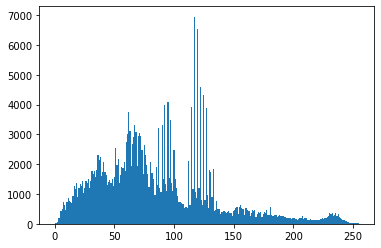

In [29]:
plt.hist(ascent.flatten(), 256)

In [31]:
#Histogram function with 2D image
def compute_histogram(image):
    tab = np.zeros ((256,), dtype='I')
    X,Y = image.shape
    for i in range(X):
        for j in range(Y) :
            tab [image[i , j]]+=1
    return tab
img = compute_histogram(ascent)

In [32]:
img

array([  38,   28,   73,  190,  190,  443,  504,  720,  645,  472,  746,
        868,  772,  744,  688,  935, 1256, 1172, 1355,  912, 1197, 1334,
       1279, 1442, 1031, 1187, 1422, 1370, 1505, 1191, 1429, 1771, 1683,
       1765, 1577, 1813, 2316, 2154, 2256, 1605, 1723, 2059, 1741, 1624,
       1307, 1409, 1481, 1378, 1488, 1270, 1575, 2557, 1980, 2176, 1367,
       1623, 1915, 1880, 2065, 1761, 2761, 3010, 3749, 3124, 1929, 2692,
       2904, 3307, 3082, 1956, 2939, 3057, 2959, 2487, 1655, 2633, 2311,
       1959, 1667, 1229, 2059, 1692, 1718, 1489,  961, 1914, 1319, 3205,
       1208, 1054, 3312, 1492, 4000, 1349, 1110, 4098, 1525, 3494, 1372,
       1098, 2470, 1496, 1187,  942,  726,  741,  689,  659,  667,  519,
        576,  547, 2121,  646,  618, 3927, 1163, 6951, 1055,  878, 6550,
       1207, 4584,  797,  628, 4337,  812, 3879,  977,  539, 1812, 1733,
        910, 1841,  419,  477,  780,  483,  489,  332,  409,  412,  439,
        387,  362,  405,  415,  370,  367,  276,  4

In [34]:
#Histogram function with flatten image ( vector)
def compute_histogram2(image):
    im = image.flatten()
    tab = np.zeros((256,), dtype='I' )
    for i in im:
        tab[i]+=1
    return tab
img2 = compute_histogram2(ascent)

In [35]:
img2

array([  38,   28,   73,  190,  190,  443,  504,  720,  645,  472,  746,
        868,  772,  744,  688,  935, 1256, 1172, 1355,  912, 1197, 1334,
       1279, 1442, 1031, 1187, 1422, 1370, 1505, 1191, 1429, 1771, 1683,
       1765, 1577, 1813, 2316, 2154, 2256, 1605, 1723, 2059, 1741, 1624,
       1307, 1409, 1481, 1378, 1488, 1270, 1575, 2557, 1980, 2176, 1367,
       1623, 1915, 1880, 2065, 1761, 2761, 3010, 3749, 3124, 1929, 2692,
       2904, 3307, 3082, 1956, 2939, 3057, 2959, 2487, 1655, 2633, 2311,
       1959, 1667, 1229, 2059, 1692, 1718, 1489,  961, 1914, 1319, 3205,
       1208, 1054, 3312, 1492, 4000, 1349, 1110, 4098, 1525, 3494, 1372,
       1098, 2470, 1496, 1187,  942,  726,  741,  689,  659,  667,  519,
        576,  547, 2121,  646,  618, 3927, 1163, 6951, 1055,  878, 6550,
       1207, 4584,  797,  628, 4337,  812, 3879,  977,  539, 1812, 1733,
        910, 1841,  419,  477,  780,  483,  489,  332,  409,  412,  439,
        387,  362,  405,  415,  370,  367,  276,  4

* execution time 2D: 1.40284 s
* execution time 1D: 1.27649 s
* execution time matplotlib : 0.261095 s

# linear mapping of image intensity
* The linear mapping is a simple method that stretches linearly the histogram.

In [38]:
def image_stretch(image):
    # return image with new maximum and minimum at 255 and 0
    minimum = image.min();
    maximum = image.max();
    a = 255/(maximum-minimum);
    b = -255*minimum/(maximum-minimum);
    return a*image+b;
img3 = image_stretch(ascent)
#If displayed with matplotlib , the images is linearly stretched, thus the modification cannot be observed.
#plt.hist(img3.flatten(), 256)

# The Alias Effect

In [46]:
#aliasing effect(Moire)
def circle ( fs , f) :
    # Generates an image with aliasing effect
    # fs : sample frequency
    # f : signal frequency
    t = np.arange (0,1,1/ fs )#start,end,steps
    ti,tj = np.meshgrid(t , t)# can play with the tis
    C = np.sin(2* np.pi * f *np. sqrt(ti**2+ tj**2))
    return C

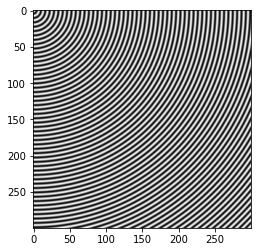

In [47]:
C = circle (300,50)
plt.imshow(C, cmap=plt.cm.gray)

In [41]:
imageio.imwrite('moire.png', C);

Lossy conversion from float64 to uint8. Range [-0.9999998998626365, 0.9999999247857407]. Convert image to uint8 prior to saving to suppress this warning.


# Low-Pass Filtering

#### 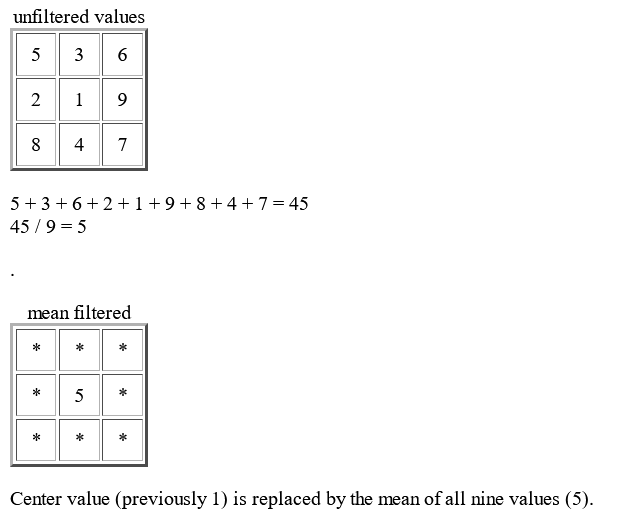mean on a 3x3 neighborhood

Text(0.5, 1.0, '25x25 mean filter')

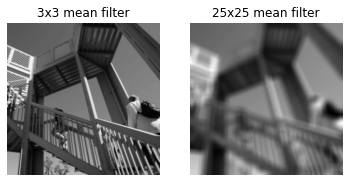

In [49]:
m3 = ndimage.filters.uniform_filter(ascent)
m25= ndimage.filters.uniform_filter(ascent,25)
plt.subplot (121)
plt.imshow(m3, cmap=plt.cm.gray)
plt.axis ('off')
plt.title ('3x3 mean filter')
plt.subplot (122)
plt.imshow(m25,cmap=plt.cm.gray)
plt.axis('off')
plt.title ('25x25 mean filter')

###  gaussian filter
* https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

In [50]:
# ascent image
ascent = misc. ascent ()
# Gaussian filter
gaussian = ndimage. filters . gaussian_filter ( ascent , 5)

Text(0.5, 1.0, 'Gaussian filter')

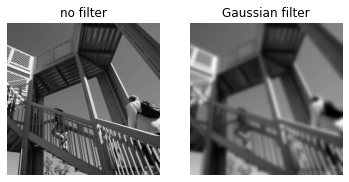

In [52]:
plt.subplot (121)
plt.imshow(ascent, cmap=plt.cm.gray)
plt.axis ('off')
plt.title ('no filter')
plt.subplot (122)
plt.imshow(gaussian,cmap=plt.cm.gray)
plt.axis('off')
plt.title ('Gaussian filter')

# High-Pass Filtering
* he computation of the high-pass filter is simply the subtraction of a low-pass filter
    from the original image

In [53]:
#H = I -m25
m25= ndimage.filters.uniform_filter(ascent,25)
HP = ascent - m25

Text(0.5, 1.0, 'High-Pass filter')

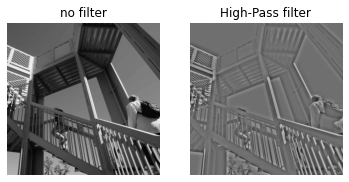

In [54]:
plt.subplot (121)
plt.imshow(ascent, cmap=plt.cm.gray)
plt.axis('off')
plt.title('no filter')
plt.subplot(122)
plt.imshow(HP,cmap=plt.cm.gray)
plt.axis('off')
plt.title ('High-Pass filter')

# derivative filtering for edge detection
* Derivative filters (Prewitt, Sobel...) use a finite derivation approximation.
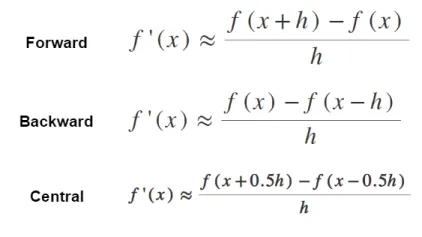
* They are very sensitive to noise (as every system using a derivation).

### 1)Prewitt filtering
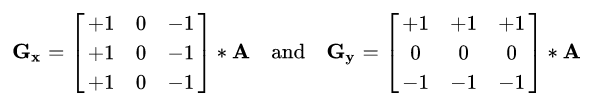
\
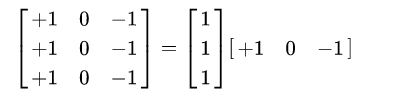
* magnetiude:
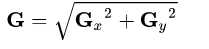
* gradient direction:
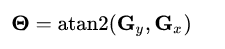

In [3]:
#ascent image
ascent = misc.ascent ()
ascent.astype('int32') ;
#Prewitt filter
prewitt0 = ndimage.filters.prewitt(ascent,axis =0)
prewitt1 = ndimage.filters.prewitt(ascent,axis =1)

### 2) sobel filtering
\
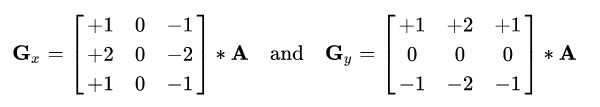
\
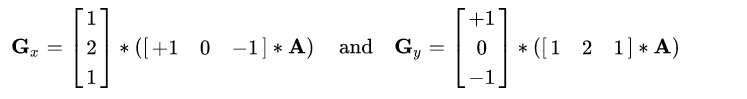

In [5]:
#Sobel filter
dy = ndimage.filters.sobel(ascent,axis =0) # vertical
dx = ndimage. filters .sobel(ascent,axis =1) # horizontal
mag = np.hypot(dx, dy) # magnitude
sobel = mag*255.0 / mag.max() # normalize (Q&D)

Text(0.5, 1.0, 'Sobel filter')

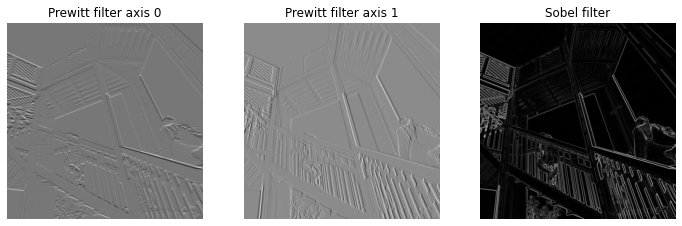

In [8]:
#display results
plt.figure(figsize=(12, 3.6))#Width, height in inches.
plt.subplot (131)
plt.imshow(prewitt0, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Prewitt filter axis 0')
plt.subplot(132)
plt.imshow(prewitt1, cmap=plt.cm.gray)
plt.axis ('off')
plt.title('Prewitt filter axis 1')
plt.subplot(133)
plt.imshow(sobel, cmap=plt.cm.gray)
plt.axis('off')
plt.title ('Sobel filter')

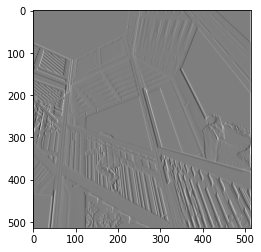

In [9]:
h = np.array([[ - 1, 0, 1],[ - 1, 0, 1],[ - 1, 0, 1] ])
grad1 = convolve2d(ascent , h) ;
plt.imshow(grad1,cmap=plt.cm.gray)

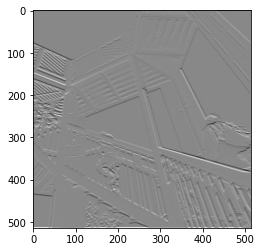

In [10]:
grad0=convolve2d(ascent ,h. transpose()) ;
plt.imshow(grad0, cmap=plt.cm.gray)

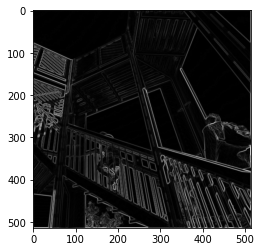

In [12]:
plt.imshow(np.sqrt(grad0**2 + grad1**2),cmap=plt.cm.gray)

# Enhancement learning

#### This functions adds the Laplacian filter to the original image.
* Image enhancement: I = α · I + HP(I)

In [19]:
def sharpen(I , alpha) :
    h = np.array ([[ - 1, - 1, - 1], [ - 1, 8, - 1], [ - 1, - 1, -1] ])
    L = convolve2d(I , h, mode='same')
    np.max(L)
    E = alpha*I + L
    E = skimage.exposure.rescale_intensity(E, out_range =(0,255) )
    E = E.astype(np.uint8)
    return E

Text(0.5, 1.0, 'Original')

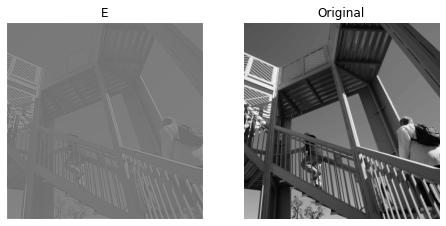

In [24]:
img4 = sharpen(ascent,2)
plt.figure(figsize=(12, 3.6))#Width, height in inches.
plt.subplot (131)
plt.imshow(img4, cmap=plt.cm.gray)
plt.axis('off')
plt.title('E')
plt.subplot(132)
plt.imshow(ascent, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original')